![MSE Logo](https://moodle.msengineering.ch/pluginfile.php/1/core_admin/logo/0x150/1643104191/logo-mse.png)

# AdvNLP Lab 1: Text Segmentation with NLTK

## 1. Introduction
The goal of the first AdvNLP lab is to run simple operations for text analysis using the [NLTK](http://www.nltk.org/) toolkit.  You will use the environment that you set up following the instructions of the previous notebook: [Python 3](https://www.python.org/) with [Jupyter](https://jupyter.org/) notebooks.  

You will use NLTK functions to get texts from the web and segment (split) them into sentences and words (also called *tokens*).  You will also experiment with extracting statistics about the texts.  In the end, you will compare statistics of texts in two languages. 

To submit your practical work, please execute anew all cells of this notebook, then save it and submit it as homework on Moodle.

**NLTK: the Natural Language (Processing) Toolkit**

Please add NLTK to your Python installation, by following the installation instructions at the [NLTK website](http://www.nltk.org/install.html).  A good way to get started is to look at [Chapter 1](http://www.nltk.org/book/ch01.html) of the [NLTK book (NLP with Python)](http://www.nltk.org/book/) and to try some of the instructions there.  

The online edition is updated for Python 3, but the printed book, also available in PDF on some websites, is only for Python 2 ([Natural Language Processing with Python: Analyzing Text with the Natural Language Toolkit, Steven Bird, Ewan Klein, and Edward Loper, O'Reilly Media, 2009](http://shop.oreilly.com/product/9780596516499.do)). 

To use NLTK in Jupyter, all you need is to `import nltk` before you need it.  You must use the prefix `nltk.` unless you write for instance: `from nltk.book import *` which will import and define several text collections (a.k.a corpora).  NLTK can download from the associated website a large number of corpora.  NLTK has a download manager which can be called from a Python interpreter (not a notebook) using `nltk.download()`.  In this practical session, we will not use any of these.

In [1]:
import nltk
nltk.download('punkt') # execute only once after installing NLTK
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\a.cavalli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\a.cavalli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

**1a.** To verify your NLTK library, please define an *array* of words called `sentence1` and use `nltk.bigrams` to generate all bigrams from it, i.e. pairs of consecutive words, sorted alphabetically.  You can see an example in [Sec. 3.3 of Ch. 1 of the NLTK book](http://www.nltk.org/book/ch01.html#collocations-and-bigrams). 

In [3]:
sentence1 = ['please', 'define', 'an', 'array', 'of', 'words', 'called', 'sentence1']
print(sorted(list(nltk.bigrams(sentence1))))

[('an', 'array'), ('array', 'of'), ('called', 'sentence1'), ('define', 'an'), ('of', 'words'), ('please', 'define'), ('words', 'called')]


## 2. Using NLTK to tokenize a text

**2a.** Using inspiration from [Chapter 3 (3.1. Processing Raw Text) of the NLTK book](http://www.nltk.org/book/ch03.html), get a book from the Gutenberg Project in text format.   What is its length? Are these bytes or characters? If you are curious about "special" characters, you can refer to [Python's documentation of Unicode support](https://docs.python.org/3.8/howto/unicode.html).

In [7]:
from urllib import request # you may need to run:  !pip install urllib
import numpy as np

In [8]:
# Please write your Python code below and execute it.

url = "https://www.gutenberg.org/ebooks/1342.txt.utf-8"
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(type(raw))
print('lenght:', len(raw))

<class 'str'>
lenght: 763033


Since the variable is a string, the length is the number of characters.

**2b.** We now want to keep only the meaningful text from the book, without the header and the final license. Determine, either by spotting the position of certain initial and final strings, or by trial and error, how much your should trim from the beginning and from the end in order to keep only the actual text of the book. Then save the result into a new string, and display its length.

In [11]:
# Please write your Python code below and execute it.
preface_idx = raw.index('PREFACE.')
end_idx = raw.index('CHISWICK PRESS:--CHARLES WHITTINGHAM AND CO.', preface_idx)
print(f'meaningful text: from {preface_idx} to {end_idx}')
text = raw[preface_idx:end_idx]
print('lenght:', len(text))

meaningful text: from 2550 to 744087
lenght: 741537


NLTK has two useful functions, one to segment a text into sentences, and the other one to segment a text into words.  Usually, only word segmentation is called *tokenization*, but NLTK uses this name for both functions.

* `nltk.sent_tokenize(...)` (documented [here](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize))
* `nltk.word_tokenize(...)` (documented [here](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.sent_tokenize))

**2c.** Please segment the text above into sentences with NLTK, display the number of sentences, and display five sentences.  Please comment briefly about the quality of the segmentation.  If you think that some special characters degrade the results, please go back and replace them in the full text (e.g. with `.replace('s1', 's2')`).

In [14]:
sentences = nltk.sent_tokenize(text, language='english')
#rand_sent_idx = np.random.randint(len(sentences), size=5)
rand_sent_idx = [ 588,  1083, 3047, 3923, 3998]
for idx in rand_sent_idx:
    print(idx, '>>>', sentences[idx])

588 >>> so
genteel and so easy!
1083 >>> The two first dances, however, brought a return of
distress: they were dances of mortification.
3047 >>> We have not met since the
26th of November, when we were all dancing together at Netherfield.”

Elizabeth was pleased to find his memory so exact; and he afterwards
took occasion to ask her, when unattended to by any of the rest, whether
_all_ her sisters were at Longbourn.
3923 >>> Yes, there was something in _that_; I told you so from the
first, you may remember.”

“I _did_ hear, too, that there was a time when sermon-making was not so
palatable to you as it seems to be at present; that you actually
declared your resolution of never taking orders, and that the business
had been compromised accordingly.”

“You did!
3998 >>> Both sisters were uncomfortable
enough.


In [15]:
text = text.replace('“', '').replace('”', '') # see for instance sentences 3047 and 3923 of the original text
sentences = nltk.sent_tokenize(text, language='english')

In [16]:
print('number of sentences:', len(sentences))
rand_sent_idx = np.random.randint(len(sentences), size=5)
for idx in rand_sent_idx:
    print(idx, '>>>', sentences[idx])

number of sentences: 6073
146 >>> Why, my dear, you must know, Mrs. Long says that Netherfield is taken
by a young man of large fortune from the north of England; that he came
down on Monday in a chaise and four to see the place, and was so much
delighted with it that he agreed with Mr. Morris immediately; that he is
to take possession before Michaelmas, and some of his servants are to be
in the house by the end of next week.
4653 >>> There were
few people on whose secrecy she would have more confidently depended;
but at the same time there was no one whose knowledge of a sister’s
frailty would have mortified her so much.
3633 >>> Mrs. Gardiner abused her stupidity.
1685 >>> Before Elizabeth had time for anything but a blush of surprise, Mrs.
Bennet instantly answered,--

Oh dear!
5264 >>> I did not wink at you.


Segmentation is quite good after handling special characters. Periods usually mark the end of the sentence; however the period after "Mrs." for instance is not considered as the end of a sentence.

**2d.** Please segment each sentence into tokens, store the result in a new variable (a list of lists), and display the same five sentences as above.  Please comment briefly on the quality of the tokenization.

In [19]:
# Please write your Python code in this cell and execute it.
tokens = [nltk.tokenize.word_tokenize(sentence, language='english') for sentence in sentences]

In [20]:
for idx in rand_sent_idx:
    print(idx, '>>>', tokens[idx])

146 >>> ['Why', ',', 'my', 'dear', ',', 'you', 'must', 'know', ',', 'Mrs.', 'Long', 'says', 'that', 'Netherfield', 'is', 'taken', 'by', 'a', 'young', 'man', 'of', 'large', 'fortune', 'from', 'the', 'north', 'of', 'England', ';', 'that', 'he', 'came', 'down', 'on', 'Monday', 'in', 'a', 'chaise', 'and', 'four', 'to', 'see', 'the', 'place', ',', 'and', 'was', 'so', 'much', 'delighted', 'with', 'it', 'that', 'he', 'agreed', 'with', 'Mr.', 'Morris', 'immediately', ';', 'that', 'he', 'is', 'to', 'take', 'possession', 'before', 'Michaelmas', ',', 'and', 'some', 'of', 'his', 'servants', 'are', 'to', 'be', 'in', 'the', 'house', 'by', 'the', 'end', 'of', 'next', 'week', '.']
4653 >>> ['There', 'were', 'few', 'people', 'on', 'whose', 'secrecy', 'she', 'would', 'have', 'more', 'confidently', 'depended', ';', 'but', 'at', 'the', 'same', 'time', 'there', 'was', 'no', 'one', 'whose', 'knowledge', 'of', 'a', 'sister', '’', 's', 'frailty', 'would', 'have', 'mortified', 'her', 'so', 'much', '.']
3633 >>

Every word is treated as a token, even the family name Gardiner.

**2e.** Please display the total number of tokens in the final result.

In [23]:
# Please write your Python code in this cell and execute it.
flattened_tokens = [token for sentence in tokens for token in sentence]
print('total nb of tokens (from sentences):', len(flattened_tokens))

total nb of tokens (from sentences): 148032


**2f.** Please tokenize now directly the initial full text, without segmenting it into sentences.  Please display the total number of tokens found, and compare this number with the one obtained above.

In [25]:
# Please write your Python code in this cell and execute it.
tokens_full_text = nltk.tokenize.word_tokenize(text, language='english')
print('total nb of tokens (from full text):', len(tokens_full_text))

total nb of tokens (from full text): 148032


In both ways, we obtain the same number of tokens. Getting a different result would have been strange, since we expect that splitting a text into sentences shouldn't break words.

**2g.** Find the size of the vocabulary of your text (the unique *word types*) by converting the list of words (the *tokens*) to a Python `set`.  Note that these *types* include punctuations and other symbols found through tokenization, and that upper/lower case letters are different.  Display all words longer than 15 characters and not containing a hyphen (-).

In [28]:
# Please write your Python code in this cell and execute it.
vocabulary = set(tokens_full_text)
print('vocabulary size:', len(vocabulary))
for token in vocabulary:
    if len(token)>15 and not '-' in token:
        print(token)

vocabulary size: 7607
misunderstanding
superciliousness
misrepresentation
communicativeness
disinterestedness
discontentedness
incomprehensible


**2h.** What is the type-token ratio (TTR) of your text?

In [30]:
print('TTR:', len(vocabulary) / len(tokens_full_text))

TTR: 0.05138753782965845


## 3. Computing statistics with NLTK
In this section, you will create a `nltk.Text` object which will enable you to compute statistics using NLTK functions.  [Chapter 1 of the NLTK book](http://www.nltk.org/book/ch01.html) provides examples of use for such objects.

A `nltk.Text` can store one of the following text formats: (1) string, (2) list of all words (list of strings), (3) list of all sentences (list of lists of strings).  However, only option (2) will allow you to use counting methods.   Note that `nltk.word_tokenize()` and `nltk.sent_tokenize()` apply to strings but not to `ntlk.Text` objects (even when they store a string).

**3a.** Please create a `nltk.Text` object from the tokenized version of your text (without sentence segmentation).

In [33]:
# Please write your Python code in this cell and execute it.
nltk_text = nltk.Text(tokens_full_text)

NLTK can compute word frequencies for a given text, yielding a new object called a frequency distribution (`FreqDist`): see [Sec. 3.1 of Ch. 1 of the NLTK book](http://www.nltk.org/book/ch01.html#frequency-distributions).  Using such an object, we can get the most frequent words.  

**3b.** Please construct the frequency distribution of your text.  Then, display the words that have at least 4 characters among the 50 most frequent words (calling the `most_common` method on the `FreqDist`), together with their number of occurrences.  Please comment briefly on the results.

In [35]:
# Please write your Python code in this cell and execute it.
fdist = nltk.FreqDist(nltk_text)
most_common_tokens = []
for token, count in fdist.most_common():
    if len(token)>3:
        most_common_tokens.append(token)
print(most_common_tokens[:50])

['that', 'with', 'have', 'Elizabeth', 'which', 'were', 'been', 'could', 'very', 'from', 'they', 'would', 'them', 'Darcy', 'their', 'what', 'said', 'will', 'your', 'this', 'such', 'Mrs.', 'Bennet', 'more', 'much', 'Miss', 'must', 'Bingley', 'when', 'than', 'there', 'Jane', 'should', 'know', 'herself', 'before', 'though', 'never', 'think', 'other', 'only', 'soon', 'sister', 'might', 'some', 'time', 'Wickham', 'most', 'Collins', 'little']


Unsurprisingly, most common words are prepositions, conjunctions, pronouns, and verbs likes "have" and "be" (and their conjugations). We also have the name of the main characters of the book.

## 4. Testing Zipf's law

It has been observed, for large amounts of texts, that when ranking words by decreasing frequencies, the ranks (1, 2, 3, ...) and the numbers of occurrences (say, 948, 321, 146, ...) follow a particular law called [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law).  Specifically, if *x&nbsp;* are the ranks and *y&nbsp;* the corresponding numbers of occurrences, their relation is approximately *y = a / x^b* for appropriate values of *a* and *b*.  If plotted in log-log coordinates, such a relation results in a linear plot (log(*y*) = *a* - *b* log(*x*)).

**4a.** Using the `FreqDist` object, please collect the frequencies of the 1000 most frequent words, rank them by decreasing values, and plot the (rank, frequency) curve on a log-log scale (simply using the `.xscale("log")` parameter of the plot).

In [38]:
# Before using matplotlib to display graphs inline, you must execute 
# the following two lines (assuming you have installed the library).
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'frequency')

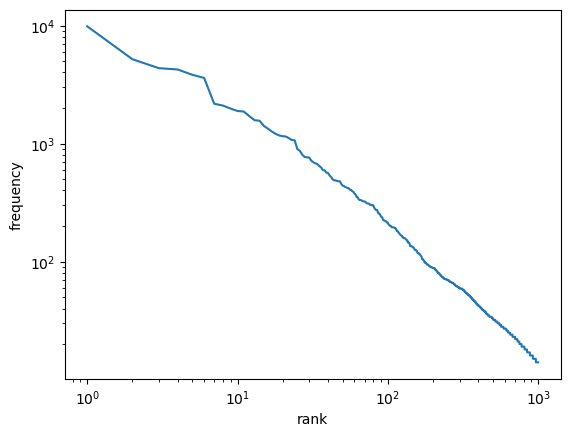

In [39]:
# Please write your Python code in this cell and execute it.
freq = [tuple[1] for tuple in fdist.most_common()][:1000]
rank = 1+np.arange(len(freq))
plt.plot(rank, freq)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('rank')
plt.ylabel('frequency')

**4b.** Please try to find manually the best values of a and b, so that the curve *y = a / x^b* (in other words (*x*, *a / x^b*)) matches as closely as possible the (frequency, rank) curve on the log-log scale.  You can use a trial-and-error approach, starting e.g. from *a* = 1000 and *b* = 1 (these values depend on the text that you tokenized).  Please display both curves on the same graph below to show how close they are. 

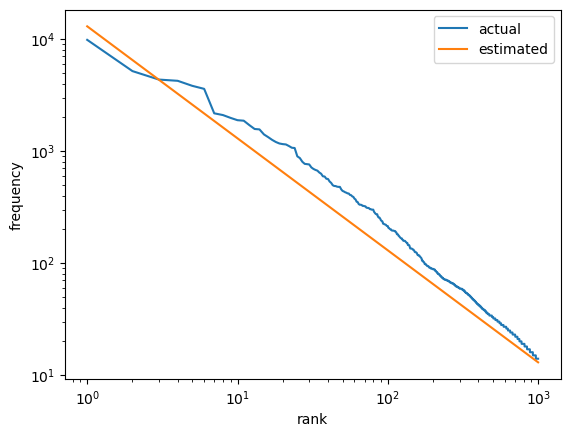

In [41]:
# Please write your Python code in this cell and execute it.
def estimate_freq(rank, a=1000, b=1):
    return a / rank ** b

est_freq = estimate_freq(rank, a=13000, b=1)

plt.plot(rank, freq, label='actual')
plt.plot(rank, est_freq, label='estimated')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.show()

**4c.** Please find automatically the best values of a and b using `scipy.optimize.curve_fit()`.  The best values are those leading to the closest fitting line (by default according to least squares).

In [43]:
import numpy as np 
import scipy

In [44]:
# Please write your Python code in this cell and execute it.
scipy.optimize.curve_fit(estimate_freq, rank, freq)

(array([1.0295114e+04, 7.9426788e-01]),
 array([[4.45643919e+03, 1.47169739e-01],
        [1.47169739e-01, 1.27316108e-05]]))

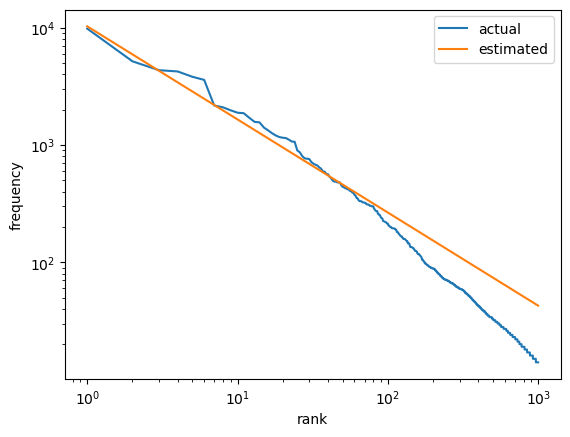

In [45]:
est_freq = estimate_freq(rank, a=1.0295114e+04, b=7.9426788e-01)

plt.plot(rank, freq, label='actual')
plt.plot(rank, est_freq, label='estimated')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.show()

## 5.  Does an undeciphered manuscript obey Zipf's law?

The Voynich manuscript is an undeciphered manuscript from the 15th century: its script and language are still unknown, and it is not impossible that it is a hoax.  You can read about it [on Wikipedia](https://en.wikipedia.org/wiki/Voynich_manuscript) or even [on a dedicated website](http://www.voynich.nu/), which provides pictures and transcriptions.  A version of it converted to ASCII characters, one word per line, is made available on Moodle as the `voynich.txt` file (all characters correspond to symbols found in the manuscript).

**5a.** Please compute the number of tokens, the number of types, and the type-to-token ration (TTR) for this document.  How does it compare with your previous text?

In [47]:
# Please write your Python code in this cell and execute it.
with open('voynich.txt') as file:
    voynich_text = file.read()

# consider each word as a token
tokens_voynich_text = voynich_text.splitlines()
vocabulary_voynich = set(tokens_voynich_text)

In [48]:
print('total nb of tokens:', len(tokens_voynich_text))
print('vocabulary size:', len(vocabulary_voynich))
print('TTR:', len(vocabulary_voynich) / len(tokens_voynich_text))

total nb of tokens: 21029
vocabulary size: 5674
TTR: 0.26981787055970324


The Voynich text has a vocabulary size of 5674, which is 25% less than the vocabulary of the book (7607), but we have to consider that the book is 7 times larger than the Voynich text (148032 tokens compared to 21029).
The TTR for the Voynich text is much higher (0.270) than the one of the book above (0.051), which means that the Voynich text contains many different words, but they're repeated less than in the book. This can be explained by the different topics that the manuscript covers (based on the images).

**5b.** Please examine if the tokens in the Voynich manuscript follow Zipf's law.  Specifically, please draw the (_rank_, _frequency_) curve in log-log scale for the 100 most frequent tokens, along with the closest (*x*, *a* / *x^b*) curve, and indicate the best values of *a* and *b*.

In [51]:
# Please write your Python code in this cell and execute it.
fdist = nltk.FreqDist(tokens_voynich_text)
fdist.most_common()

[('8AM', 543),
 ('SC89', 319),
 ('OE', 277),
 ('ZC89', 274),
 ('SOE', 255),
 ('4OFC89', 203),
 ('4OFAN', 190),
 ('4OFCC89', 189),
 ('8AR', 185),
 ('SC9', 179),
 ('89', 179),
 ('AM', 178),
 ('OR', 172),
 ('SOR', 161),
 ('4OFAM', 154),
 ('4OFCC9', 139),
 ('AR', 137),
 ('ZC9', 137),
 ('8AN', 131),
 ('ZOE', 130),
 ('4OFAE', 129),
 ('2', 127),
 ('8AE', 123),
 ('OFAM', 122),
 ('AE', 105),
 ('S9', 104),
 ('4OE', 97),
 ('Q9', 92),
 ('4OF9', 92),
 ('2AM', 88),
 ('SX9', 87),
 ('OPC89', 86),
 ('4OFAR', 85),
 ('SCC9', 84),
 ('ZO', 83),
 ('ZOR', 79),
 ('8OE', 78),
 ('OPAM', 78),
 ('OFAN', 76),
 ('OP9', 76),
 ('S89', 75),
 ('OFC89', 75),
 ('OFAE', 71),
 ('SCOE', 70),
 ('OPAR', 70),
 ('ZCC9', 69),
 ('9', 68),
 ('ESC89', 67),
 ('4OPC89', 66),
 ('OFCC9', 65),
 ('Z9', 64),
 ('OFAR', 64),
 ('OFCC89', 62),
 ('OF9', 58),
 ('4OP9', 58),
 ('OPAN', 58),
 ('OPCC9', 57),
 ('OPAE', 56),
 ('4OFC9', 55),
 ('SO89', 54),
 ('SQ9', 54),
 ('4OPS9', 52),
 ('4OFS9', 52),
 ('8OR', 51),
 ('8AJ', 51),
 ('ZCC89', 50),
 ('OPC

In [52]:
freq = [tuple[1] for tuple in fdist.most_common()][:100]
rank = 1+np.arange(len(freq))
scipy.optimize.curve_fit(estimate_freq, rank, freq)

(array([5.4369612e+02, 5.3353230e-01]),
 array([[1.18532919e+02, 7.22701725e-02],
        [7.22701725e-02, 7.03017589e-05]]))

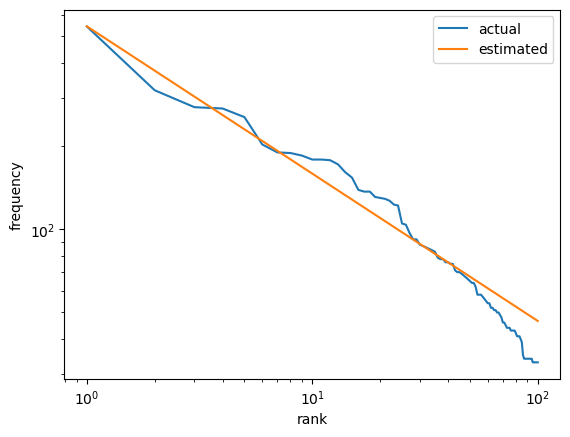

In [53]:
est_freq = estimate_freq(rank, a=5.4369612e+02, b=5.3353230e-01)

plt.plot(rank, freq, label='actual')
plt.plot(rank, est_freq, label='estimated')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.show()

**5c.** What are your conclusions regarding Voynich's manuscript?  Is it likely to be similar to a real text in an unknown language?  In your answer, consider the values of TTR, the two parameters *a* and *b*, and the fitting of the *y = a / x^b* curve.

It could be a real text in an unknown language, because the value of TTR seems explainable by the length of the text and the different topics it covers.
The two parameters a and b have values that also look plausible (*a* being clost to the frequency of the 1st most common word in the text).
The Zipf's law is respected by the Voynich's manuscript, with a theoretical *y = a / x^b* curve fitting well the mesured (_rank_, _frequency_) curve.

## End of AdvNLP Lab 1
Please cleand and save the completed notebook, and upload it to Moodle.